In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Desktop\\temps.csv')

In [3]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [4]:
df=pd.get_dummies(df)

In [6]:
df.head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [7]:
import numpy as np

In [8]:
y=np.array(df['actual'])

In [10]:
df=df.drop('actual',axis=1)

In [11]:
df_list=list(df.columns)

In [15]:
x=np.array(df)

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [30]:
baseline_pred=x_test[:,df_list.index('average')]

In [31]:
baseline_pred

array([66.1, 60.7, 48. , 61. , 70.4, 63. , 77.1, 76.6, 55.6, 68. , 54.2,
       68.3, 45.9, 59.9, 71.5, 49.4, 52.2, 54.5, 51.3, 72.4, 63.3, 50. ,
       69.7, 59.9, 55.2, 48.3, 66.1, 46.5, 65.9, 76. , 59.7, 61.2, 48. ,
       76.5, 77.4, 51.2, 49.6, 48.7, 73.5, 45.1, 61.6, 55.5, 59.4, 46.1,
       57.8, 61.9, 51.5, 76.8, 53.9, 46.4, 45.1, 45.9, 64.9, 66.8, 72.1,
       56.5, 50.1, 54.5, 53.7, 60.5, 68.8, 48.9, 52.4, 70. , 54.3, 56.8,
       73.3, 74. , 76.6, 46. , 72.6, 54.6, 56.3, 47.4, 52.8, 63.4, 46.3,
       76.9, 45.3, 49.1, 50. , 56.9, 67.9, 70. , 63.7, 51.9, 45.1])

In [37]:
baseline_error=abs(baseline_pred-y_test)
print('Average Baseline Error:',round(np.mean(baseline_error),2))

('Average Baseline Error:', 5.06)


In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

In [41]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [42]:
pred=rf.predict(x_test)

In [43]:
error = abs(pred - y_test)
print('Average model error:', round(np.mean(error), 2), 'degrees.')

('Average model error:', 3.87, 'degrees.')


In [44]:
improvement_baseline = 100 * abs(np.mean(error) - np.mean(baseline_error)) / np.mean(baseline_error)
print('Improvement over baseline:', round(improvement_baseline, 2), '%.')

('Improvement over baseline:', 23.45, '%.')


In [45]:
mape = 100 * (error / y_test)

In [46]:
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

('Accuracy:', 93.93, '%.')


In [48]:
features=pd.read_csv('Desktop/temps_extended.csv')

In [49]:
features.head()

,year,month,day,weekday,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
0,2011,1,1,Sat,4.92,0.00,0,36,37,45.6,40,40
1,2011,1,2,Sun,5.37,0.00,0,37,40,45.7,39,50
2,2011,1,3,Mon,6.26,0.00,0,40,39,45.8,42,42
3,2011,1,4,Tues,5.59,0.00,0,39,42,45.9,38,59
4,2011,1,5,Wed,3.80,0.03,0,42,38,46.0,45,39


In [52]:
print("we have {} days of data with {} variables".format(*features.shape))

we have 2191 days of data with 12 variables


In [55]:
features.describe()

,year,month,day,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000
mean,2013.501597,6.523505,15.713829,7.371734,0.116276,0.010041,61.173893,61.177545,60.285897,61.177545,60.313555
std,1.709461,3.449872,8.801867,3.154971,0.251575,0.153764,13.085681,13.082281,10.732582,13.081339,15.871568
min,2011.000000,1.000000,1.000000,0.890000,0.000000,0.000000,29.000000,29.000000,45.100000,29.000000,25.000000
25%,2012.000000,4.000000,8.000000,5.140000,0.000000,0.000000,51.000000,51.000000,50.100000,51.000000,49.000000
50%,2014.000000,7.000000,16.000000,6.710000,0.000000,0.000000,60.000000,60.000000,58.800000,60.000000,60.000000
75%,2015.000000,10.000000,23.000000,9.170000,0.120000,0.000000,71.000000,71.000000,70.200000,71.000000,71.000000
max,2017.000000,12.000000,31.000000,21.250000,2.200000,3.000000,96.000000,96.000000,77.400000,96.000000,97.000000


In [64]:
import datetime

In [57]:
years=features['year']
months=features['month']
days=features['day']

In [69]:
dates=[str(int(year)) +'-'+ str(int(month)) +'-'+ str(int(day)) for year,month,day in zip( years, months, days)]

In [73]:
dates=[datetime.datetime.strptime(date,'%Y-%m-%d') for date in dates]

In [75]:
import matplotlib.pyplot as plt

In [76]:
% matplotlib inline

In [77]:
plt.style.use('fivethirtyeight')

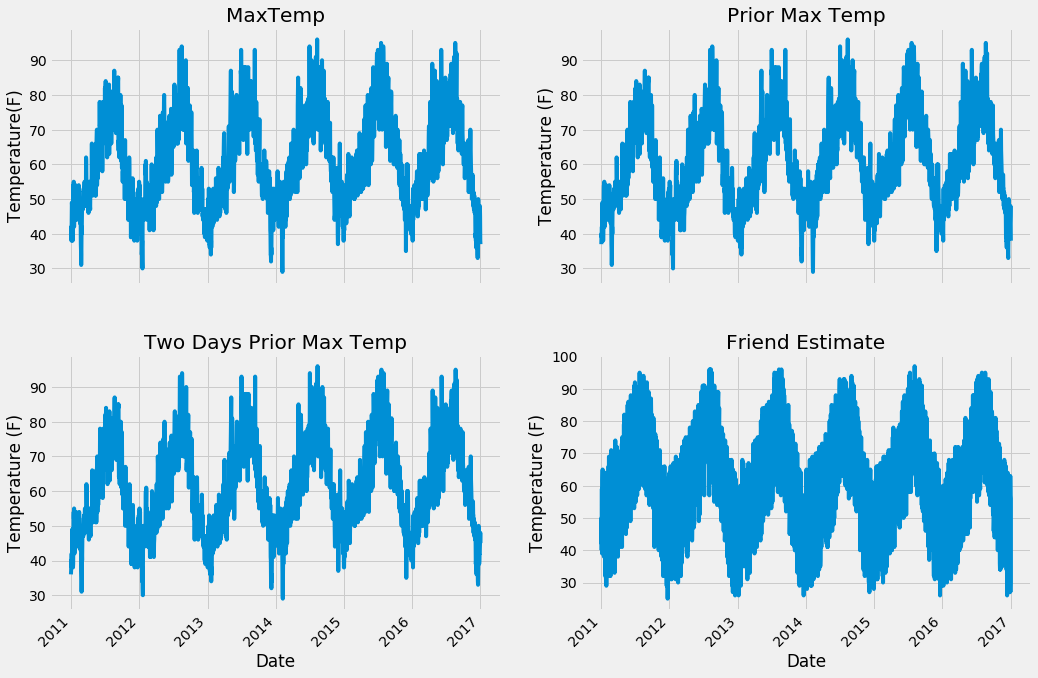

In [79]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
fig.autofmt_xdate(rotation = 45)

ax1.plot(dates,features['actual'])
ax1.set_xlabel(" "); ax1.set_ylabel("Temperature(F)"); ax1.set_title('MaxTemp')

ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature (F)'); ax2.set_title('Prior Max Temp')

ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature (F)'); ax3.set_title('Two Days Prior Max Temp')

ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature (F)'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

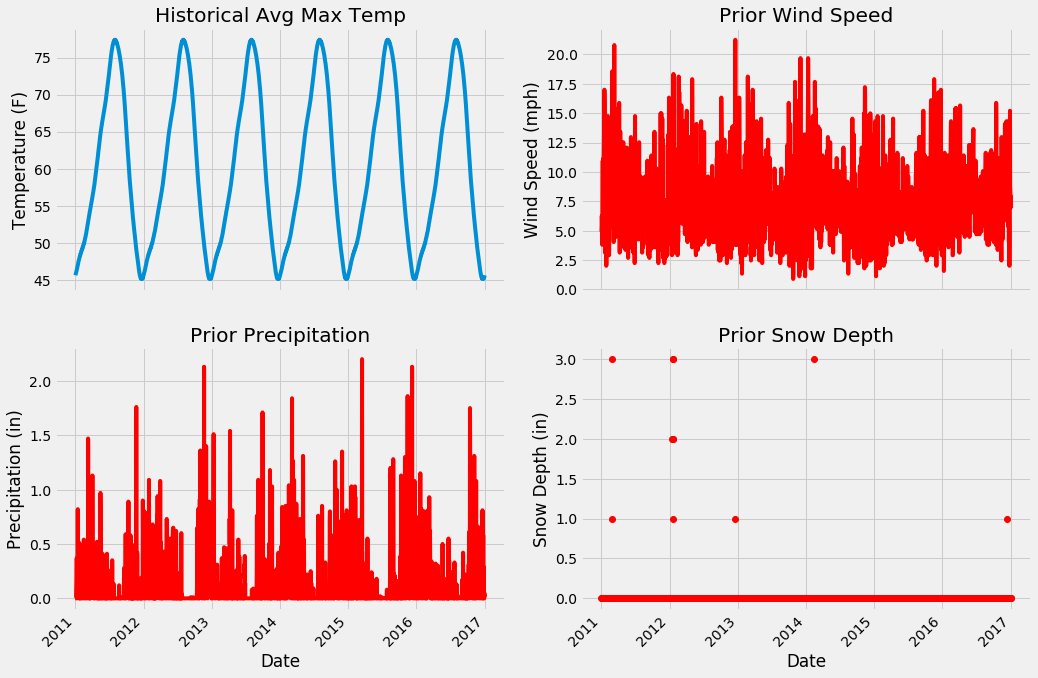

In [80]:

# Set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
fig.autofmt_xdate(rotation = 45)

# Historical Average Max Temp
ax1.plot(dates, features['average'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature (F)'); ax1.set_title('Historical Avg Max Temp')

# Prior Avg Wind Speed 
ax2.plot(dates, features['ws_1'], 'r-')
ax2.set_xlabel(''); ax2.set_ylabel('Wind Speed (mph)'); ax2.set_title('Prior Wind Speed')

# Prior Precipitation
ax3.plot(dates, features['prcp_1'], 'r-')
ax3.set_xlabel('Date'); ax3.set_ylabel('Precipitation (in)'); ax3.set_title('Prior Precipitation')

# Prior Snowdepth
ax4.plot(dates, features['snwd_1'], 'ro')
ax4.set_xlabel('Date'); ax4.set_ylabel('Snow Depth (in)'); ax4.set_title('Prior Snow Depth')

plt.tight_layout(pad=2)

In [84]:
season=[]

for month in features['month']:
    if month in [1,2,12]:
        season.append('winters')
    elif month in [3,4,5]:
        season.append('spring')
    elif month in [6,7,8]:
        season.append('sumers')
    elif month in [9,10,11]:
        season.append('fall')
        
reduced_features = features[['temp_1', 'prcp_1', 'average', 'actual']]
reduced_features['season'] = season

C:\Users\Sagar\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


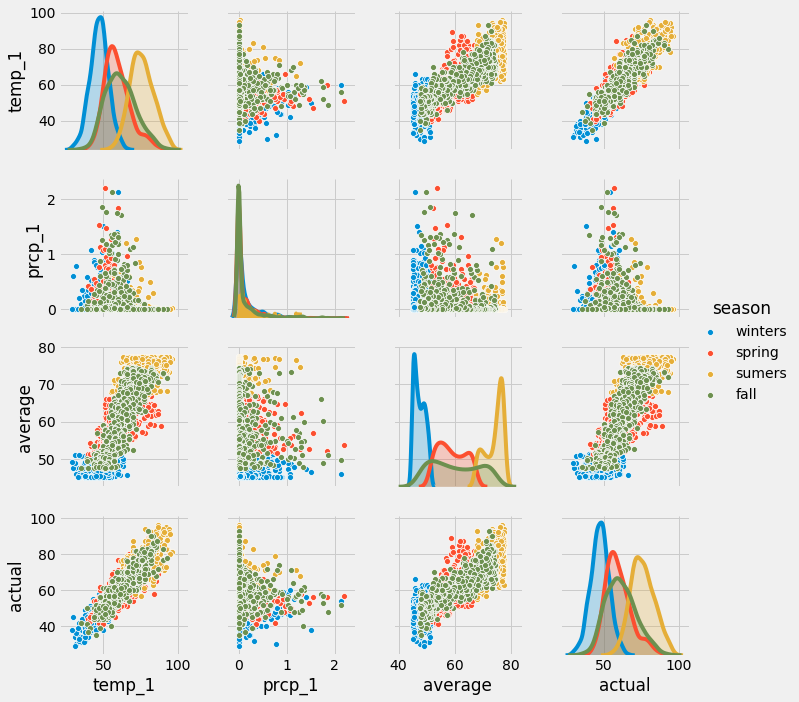

In [86]:
import seaborn as sns
sns.pairplot(reduced_features,hue='season')
